# Imports and Functions (run first)
This notebook was written to run on Google Colaboratory

In [109]:
# Imports for all problems
import numpy as np
from sympy import Matrix, latex, Rational, symbols, simplify, expand, cos, sin, pi, sqrt, acos, Eq, solve
from IPython.display import display, Math
import random

# variable symbols
a,b,c,d,e,f,g,h,i,j,k,l,m,n,o,p = symbols('a,b,c,d,e,f,g,h,i,j,k,l,m,n,o,p')

def mprint(matrix):
    display(Math(latex(matrix)))

def ansprint(ftext):
    print("*"*35 + "--ANSWER--" + "*"*35 + "\n")
    print(ftext)
    print("\n" + "*"*35 + "--ANSWER--" + "*"*35)

def row_replace(self, x, y, z):
    """
    Replace row x with row_x + y * row_z.
    x: target row index (1st row is 1)
    y: scalar multiplier
    z: source row index (1st row is 1)
    """
    result = self.elementary_row_op(op="n->n+km", row=(x-1), k=y, row1=(z-1))
    return result

def row_scale(self, x, y):
    """
    Scale row x by y
    x: target row index (1st row is 1)
    y: scalar multiplier
    """
    result = self.elementary_row_op(op="n->kn", row=(x-1), k=y)
    return result

def row_switch(self, x, y):
    """
    Swap rows x and y.
    x: first row index (1st row is 1)
    y: second row index (1st row is 1)
    """
    result = self.copy()
    result.row_swap(x-1, y-1)
    return result

# Add row_rep to Matrix class
Matrix.row_replace = row_replace
Matrix.row_scale = row_scale
Matrix.row_switch = row_switch

# Test Matrices

In [110]:
# some useful matrices for testing
# Create symbols for the first 16 lowercase letters
letters = symbols('a b c d e f g h i j k l m n o p')

# Create a 4x4 matrix using the symbols
Avar = Matrix(4, 4, letters)
mprint(Avar)

# matrix with random numbers
random.seed(88)
Arand = Matrix([[random.randint(0, 9) for _ in range(4)] for _ in range(4)])
mprint(Arand)

# Matrix with rows identified
Arows = Matrix(np.matrix('1 1 1 1;2 2 2 2;3 3 3 3;4 4 4 4'))
mprint(Arows)

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

# Exercise 1

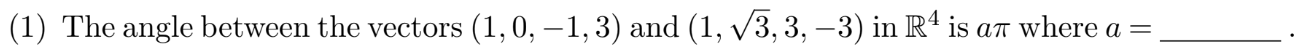

In [111]:
# cos(angle) = dot(a,b)/(norm(a)*norm(b))
v1 = Matrix([1,0,-1,3])
v2 = Matrix([1,sqrt(3),3,-3])
# Compute the dot product
dot_product = v1.dot(v2)

# Compute L2 norms
norm_1 = v1.norm()
norm_2 = v2.norm()

# Compute cosine of the angle
cos_theta = dot_product / (norm_1 * norm_2)

# Compute the angle in radians
theta = acos(cos_theta)

# Simplify to express in terms of pi
theta_simplified = simplify(theta)

# Print results
print(f"Dot product: {dot_product}")
print(f"Cosine of angle: {cos_theta}")
print(f"Angle in radians: {theta_simplified}")
ansprint("a = 3/4")

Dot product: -11
Cosine of angle: -sqrt(2)/2
Angle in radians: 3*pi/4
***********************************--ANSWER--***********************************

a = 3/4

***********************************--ANSWER--***********************************


# Exercise 2

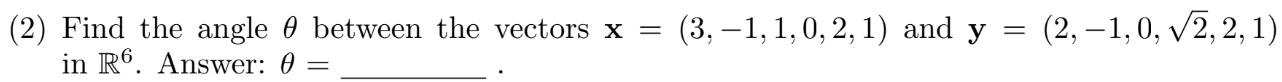

In [112]:
# cos(angle) = dot(a,b)/(norm(a)*norm(b))
v1 = Matrix([3,-1,1,0,2,1])
v2 = Matrix([2,-1,0,sqrt(2),2,1])
# Compute the dot product
dot_product = v1.dot(v2)

# Compute L2 norms
norm_1 = v1.norm()
norm_2 = v2.norm()

# Compute cosine of the angle
cos_theta = dot_product / (norm_1 * norm_2)

# Compute the angle in radians
theta = acos(cos_theta)

# Simplify to express in terms of pi
theta_simplified = simplify(theta)

# Print results
print(f"Dot product: {dot_product}")
print(f"Cosine of angle: {cos_theta}")
print(f"Angle in radians: {theta_simplified}")
ansprint("theta = pi/6")

Dot product: 12
Cosine of angle: sqrt(3)/2
Angle in radians: pi/6
***********************************--ANSWER--***********************************

theta = pi/6

***********************************--ANSWER--***********************************


# Exercise 3

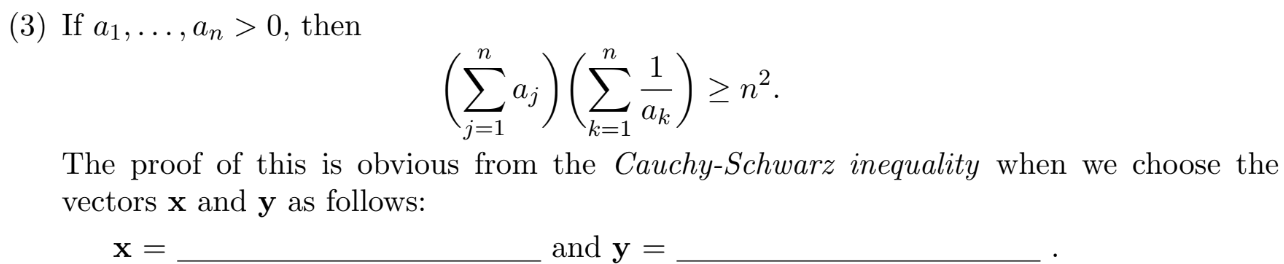

In [113]:
# Cauchy-Schwarz inequality states that (X.Y)^2 <= ||X||^2 * ||Y||^2
# Rearrange so it's lined up with above ||X||^2 * ||Y||^2 >= (X.Y)^2
# the left-hand side of the problem above is equal to:
expand((a+b+c)*(1/a+1/b+1/c))

a/c + a/b + b/c + 3 + c/b + b/a + c/a

In [114]:
# if a = b = c = 1, then the expression is 9 which equals 3^2
# if a=1,b=2, then a/b+b/2 = 2.5 which is >2 (when a=b=1) and is >2 for all b>1
# if a=1,b=1/2, then a/b+b/2 = 2.5 which is also >2
# whenever a != b, a/b+b/a is >2, so the inequality holds

In [115]:
# NOW, how does the Cauchy-Schwarz inequality figure in?
# let's compute both sides of the inequality:
A = Matrix([a,b,c])
B = Matrix([d,e,f])
mprint(expand(A.dot(B)**2))

<IPython.core.display.Math object>

In [116]:
expand(A.norm()**2 * B.norm()**2)

Abs(a)**2*Abs(d)**2 + Abs(a)**2*Abs(e)**2 + Abs(a)**2*Abs(f)**2 + Abs(b)**2*Abs(d)**2 + Abs(b)**2*Abs(e)**2 + Abs(b)**2*Abs(f)**2 + Abs(c)**2*Abs(d)**2 + Abs(c)**2*Abs(e)**2 + Abs(c)**2*Abs(f)**2

In [117]:
extra_right = a*a*e*e + a*a*f*f + b*b*d*d + b*b*f*f + c*c*d*d + c*c*e*e
extra_right

a**2*e**2 + a**2*f**2 + b**2*d**2 + b**2*f**2 + c**2*d**2 + c**2*e**2

In [118]:
extra_left = 2*a*b*d*e + 2*a*c*d*f + 2*b*c*e*f
extra_left

2*a*b*d*e + 2*a*c*d*f + 2*b*c*e*f

In [119]:
# grok figured out that the right-side is alwasy bigger than the left-side, or the same
# here's the difference term: (ae−bd)^2+(af−cd)^2+(bf−ce)^2 ≥ 0

In [120]:
# Try these
X = Matrix([a,b,c])
Y = Matrix([1/a,1/b,1/c])
mprint(X.dot(Y)**2) # this equals n^2!

<IPython.core.display.Math object>

In [121]:
expand((X.norm()**2)*(Y.norm()**2))

Abs(a)**2/Abs(c)**2 + Abs(a)**2/Abs(b)**2 + Abs(b)**2/Abs(c)**2 + 3 + Abs(c)**2/Abs(b)**2 + Abs(b)**2/Abs(a)**2 + Abs(c)**2/Abs(a)**2

In [122]:
# this is functionally the same as the left-hand side above
expand((a+b+c)*(1/a+1/b+1/c))

a/c + a/b + b/c + 3 + c/b + b/a + c/a

In [123]:
# so, I think this is the answer
ansprint("X is matrix [a1, a2, ..., an], and Y is matrix [1/a1, 1/a2, ..., 1/an]")

***********************************--ANSWER--***********************************

X is matrix [a1, a2, ..., an], and Y is matrix [1/a1, 1/a2, ..., 1/an]

***********************************--ANSWER--***********************************


In [124]:
# I looked up the answer and it's actually this:
# so close!
X = Matrix([sqrt(a),sqrt(b),sqrt(c)])
Y = Matrix([1/sqrt(a),1/sqrt(b),1/sqrt(c)])
mprint(X.dot(Y)**2) # this equals n^2!

<IPython.core.display.Math object>

In [125]:
simplify(expand((X.norm()**2)*(Y.norm()**2)))

Abs(b/a) + Abs(c/a) + Abs(a/b) + Abs(a/c) + Abs(c/b) + Abs(b/c) + 3

# Exercise 4

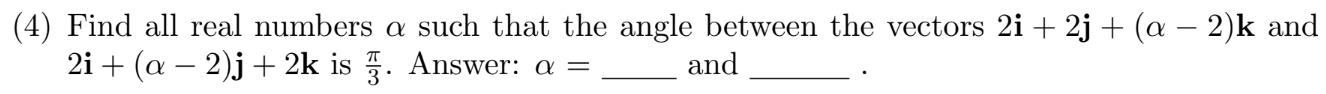

In [126]:
# angle = acos(dot(u,v)/(norm(u)*norm(v)))
# cos(angle) = dot(a,b)/(norm(a)*norm(b))
v1 = Matrix([2,2,(a-2)])
v2 = Matrix([2,(a-2),2])
# Compute the dot product
dot_product = v1.dot(v2)

# Compute L2 norms
norm_1 = v1.norm()
norm_2 = v2.norm()

# Compute cosine of the angle
cos_theta = dot_product / (norm_1 * norm_2)
cos_theta

(4*a - 4)/(Abs(a - 2)**2 + 8)

In [127]:
cos(pi/3)

1/2

In [128]:
print(cos_theta)

(4*a - 4)/(Abs(a - 2)**2 + 8)


In [129]:
equation = Eq( (4*a - 4)/((a - 2)**2 + 8),cos(pi/3))
solve(equation)

[2, 10]

In [130]:
# check the answers
# a = 2
v1 = Matrix([2,2,0])
v2 = Matrix([2,0,2])
# Compute the dot product
dot_product = v1.dot(v2)

# Compute L2 norms
norm_1 = v1.norm()
norm_2 = v2.norm()

# Compute cosine of the angle
cos_theta = dot_product / (norm_1 * norm_2)
cos_theta

1/2

In [131]:
# check the answers
# a = 2
v1 = Matrix([2,2,8])
v2 = Matrix([2,8,2])
# Compute the dot product
dot_product = v1.dot(v2)

# Compute L2 norms
norm_1 = v1.norm()
norm_2 = v2.norm()

# Compute cosine of the angle
cos_theta = dot_product / (norm_1 * norm_2)
cos_theta

1/2

In [132]:
ansprint(f"alpha = {solve(equation)}")

***********************************--ANSWER--***********************************

alpha = [2, 10]

***********************************--ANSWER--***********************************


# Exercise 5

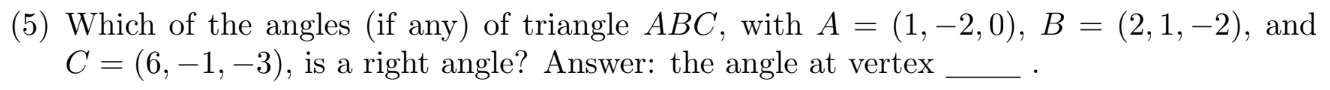

In [133]:
# looking for cos(pi/2)
cos(pi/2)

0

In [134]:
# which means dot product is 0
A = Matrix([1,-2,0])
B = Matrix([2,1,-2])
C = Matrix([6,-1,-3])
# To test each angle, need to take the difference of the vectors
# Angle at A
print(f"Dot-product for Angle A: {(A-B).dot((A-C))}")
print(f"Dot-product for Angle B: {(B-A).dot((B-C))}")
print(f"Dot-product for Angle C: {(C-A).dot((C-B))}")

Dot-product for Angle A: 14
Dot-product for Angle B: 0
Dot-product for Angle C: 21


In [135]:
ansprint("The angle with a right angle is at vertex B")

***********************************--ANSWER--***********************************

The angle with a right angle is at vertex B

***********************************--ANSWER--***********************************


# Exercise 6

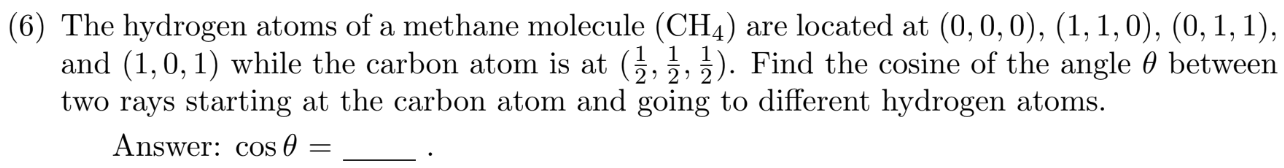

In [136]:
# Atom coordinates
C = Matrix([0.5,0.5,0.5])
H1 = Matrix([0,0,0])
H2 = Matrix([1,1,0])
# To test an angle, need to take the difference of the vectors
v1 = C-H1
v2 = C-H2
# Compute the dot product
dot_product = v1.dot(v2)

# Compute L2 norms
norm_1 = v1.norm()
norm_2 = v2.norm()

# Compute cosine of the angle
cos_theta = dot_product / (norm_1 * norm_2)
cos_theta

-0.333333333333333

In [137]:
print(f"angle is {round(acos(cos_theta),2)} radians")
print(f"angle is {round(float(acos(cos_theta)/(2*pi)*360),1)} degrees")

angle is 1.91 radians
angle is 109.5 degrees


# Exercise 7

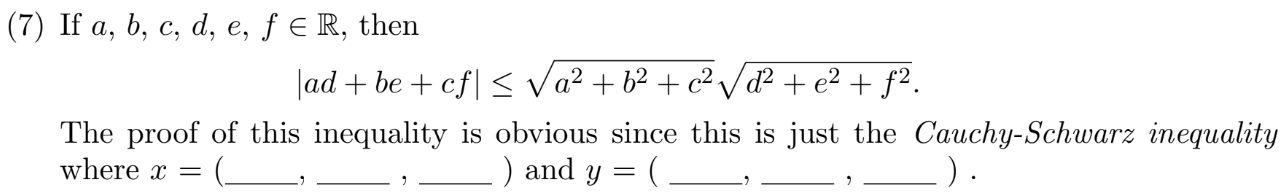

In [138]:
# Cauchy-Schwarz inequality states that |(X.Y)| <= ||X|| * ||Y||
# Let's try:
X = Matrix([a,b,c])
Y = Matrix([d,e,f])
X.dot(Y)

a*d + b*e + c*f

In [139]:
X.norm() * Y.norm()

sqrt(Abs(a)**2 + Abs(b)**2 + Abs(c)**2)*sqrt(Abs(d)**2 + Abs(e)**2 + Abs(f)**2)

In [140]:
# it works
ansprint("x = (a,b,c), y = (d,e,f)")

***********************************--ANSWER--***********************************

x = (a,b,c), y = (d,e,f)

***********************************--ANSWER--***********************************


# Exercise 8

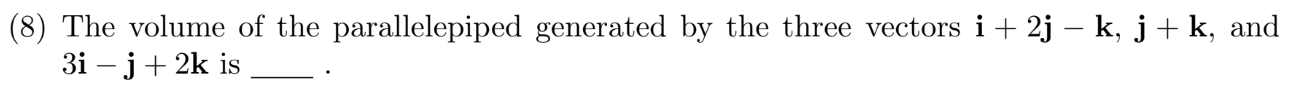

In [141]:
# the determinant gives the volume of a parallelepiped
A = Matrix([1, 2, -1])
B = Matrix([0, 1, 1])
C = Matrix([3, -1, 2])
ansprint(f"the volume is {Matrix.hstack(A, B, C).det()}")

***********************************--ANSWER--***********************************

the volume is 12

***********************************--ANSWER--***********************************


# Exercise 9

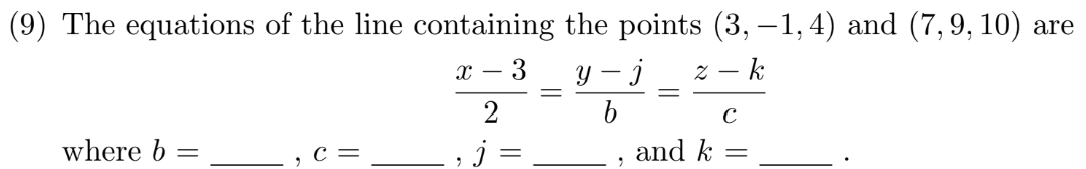

In [142]:
# One way to get the line is to start from one of the points and then take the difference vector for the direction
P1 = Matrix([3,-1,4])
P2 = Matrix([7,9,10])
diff = P2 - P1
diff/2 # diff is all multiples of 2 and a, diff[0], is 2 in the problem

Matrix([
[2],
[5],
[3]])

In [143]:
# in the symmetric form below, the starting point is at (x0, y0, z0)
# and the direction vector is (a, b, c)
# Therefore, it's just a matter of plugging in the numbers
ansprint("b=5, c=3, j=-1, k=4")

***********************************--ANSWER--***********************************

b=5, c=3, j=-1, k=4

***********************************--ANSWER--***********************************


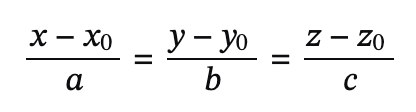

# Exercise 10

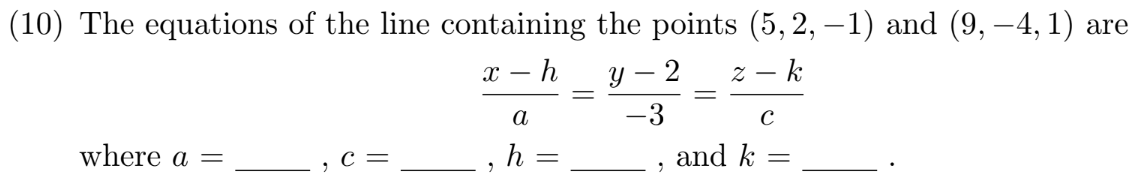

In [144]:
P1 = Matrix([5,2,-1])
P2 = Matrix([9,-4,1])
diff = P2 - P1
diff/2

Matrix([
[ 2],
[-3],
[ 1]])

In [145]:
ansprint("a=2, c=1, h=5, k=-1")

***********************************--ANSWER--***********************************

a=2, c=1, h=5, k=-1

***********************************--ANSWER--***********************************


In [146]:
# for putting in Demos: (x-5)/2 = (y-2)/-3 = (z+1)/1

# Exercise 11

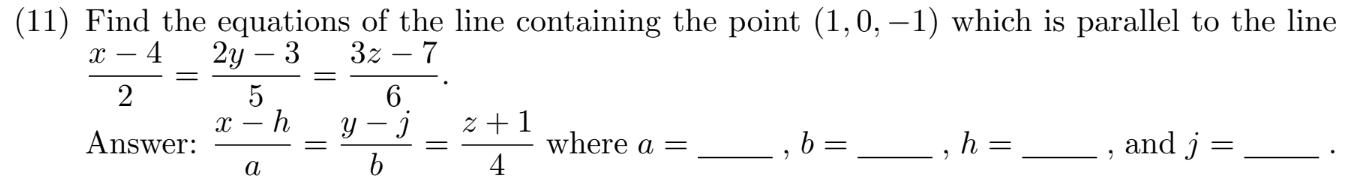

In [147]:
# if it's parallel to the line given, then the direction is (2,5,6)
dir = Matrix([2, Rational(5,2) , 2])
print(dir)
# scale by 2 so c fits the new line equation
dir_scaled = dir * 2
dir_scaled

Matrix([[2], [5/2], [2]])


Matrix([
[4],
[5],
[4]])

In [148]:
ansprint("a = 4, b = 5, h = 1, j = 0")

***********************************--ANSWER--***********************************

a = 4, b = 5, h = 1, j = 0

***********************************--ANSWER--***********************************


# Exercise 12

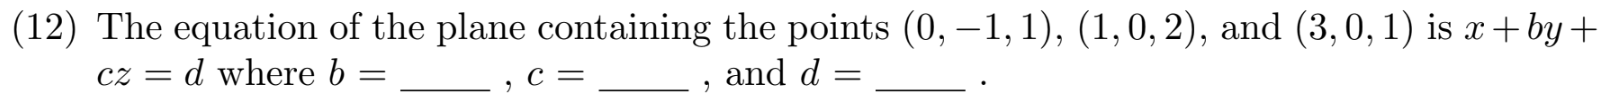

In [149]:
# equation for a plane is a*x + b*y + c*z = d
# where (a,b,c) is the normal vector to two vectors in the plane (orthogonal to those two)
A = Matrix([0,-1,1])
B = Matrix([1,0,2])
C = Matrix([3,0,1])
AB = B - A
AC = C - A
n = Matrix.cross(AC, AB) # did it in this order so first value is 1 not -1
n

Matrix([
[ 1],
[-3],
[ 2]])

In [150]:
print(tuple(AB), tuple(AC), tuple(n))

(1, 1, 1) (3, 1, 0) (1, -3, 2)


In [151]:
# check to make sure cp is orthogonal to both AB and AC
print(n.dot(AB))
print(n.dot(AC))

0
0


In [152]:
# Use point-normal form to get the plane equation
x, y, z = symbols('x y z')
equation = n[0]*(x - A[0]) + n[1]*(y - A[1]) + n[2]*(z - A[2])
print("Plane equation:", equation, "= 0")

Plane equation: x - 3*y + 2*z - 5 = 0


In [153]:
ansprint("b = -3, c = 2, d = 5")

***********************************--ANSWER--***********************************

b = -3, c = 2, d = 5

***********************************--ANSWER--***********************************


In [154]:
# confirmed in Desmos that these three points are on the plane
print(tuple(A), tuple(B), tuple(C))

(0, -1, 1) (1, 0, 2) (3, 0, 1)


# Exercise 13

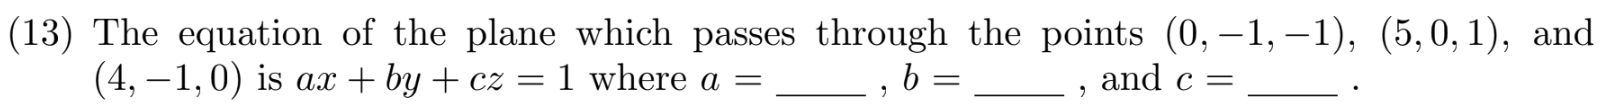

In [155]:
# equation for a plane is a*x + b*y + c*z = d
# where (a,b,c) is the normal vector to two vectors in the plane (orthogonal to those two)
A = Matrix([0,-1,-1])
B = Matrix([5,0,1])
C = Matrix([4,-1,0])
AB = B - A
AC = C - A
n = Matrix.cross(AB, AC) # did it in this order so first value is 1 not -1
n

Matrix([
[ 1],
[ 3],
[-4]])

In [156]:
print(tuple(AB), tuple(AC), tuple(n)) # for plotting in Desmos

(5, 1, 2) (4, 0, 1) (1, 3, -4)


In [157]:
# check to make sure cp is orthogonal to both AB and AC
print(n.dot(AB))
print(n.dot(AC))

0
0


In [158]:
# Use point-normal form to get the plane equation
# this gives us d, because a,b,c are already found from n
x, y, z = symbols('x y z')
equation = n[0]*(x - A[0]) + n[1]*(y - A[1]) + n[2]*(z - A[2])
print("Plane equation:", equation, "= 0")

Plane equation: x + 3*y - 4*z - 1 = 0


In [159]:
ansprint("a = 1, b = 3, c = -4")

***********************************--ANSWER--***********************************

a = 1, b = 3, c = -4

***********************************--ANSWER--***********************************


# Exercise 14

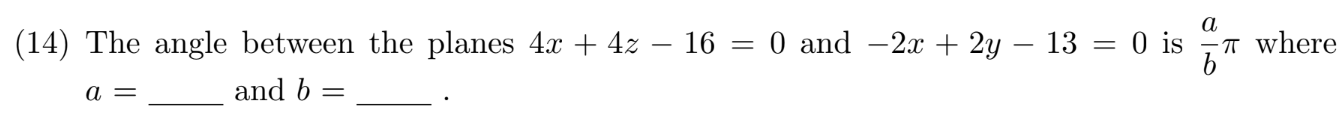

In [160]:
# the angle between the planes would be the same as the angle between the normal vectors
# and the normal vectors are the coefficients of x, y & z
# there are actually two angles between two planes: the acute and obtuse
# by taking the abs value of the dot product, we get just the acute angle
n1 = Matrix([4, 0, 4])
n2 = Matrix([-2, 2, 0])
cos_theta = abs(n1.dot(n2))/(n1.norm()*n2.norm())
cos_theta

1/2

In [161]:
acos(cos_theta)

pi/3

In [162]:
ansprint("a = 1, b = 3")

***********************************--ANSWER--***********************************

a = 1, b = 3

***********************************--ANSWER--***********************************


# Exercise 15

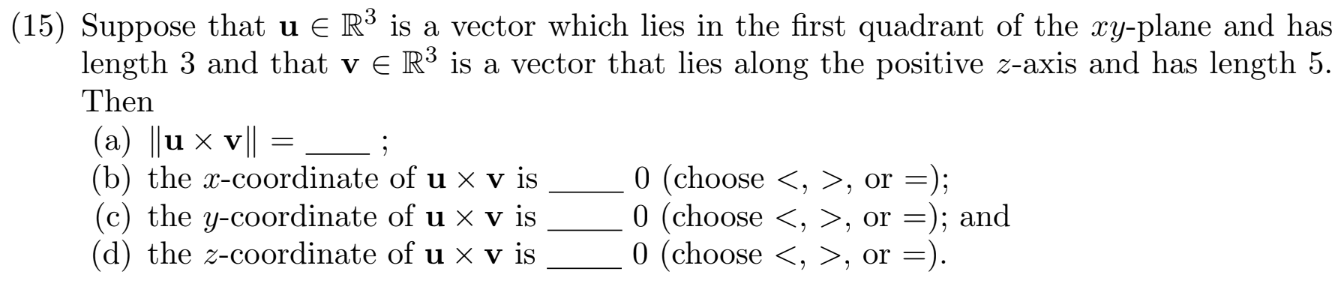

In [163]:
ansprint("""
(a) the magnitude of the cross product is 15 (area of parallelogram)
(b) the x-coordinate is > 0
(c) the y-coordinate is < 0
(d) the z-coordinate is = 0
""")

***********************************--ANSWER--***********************************


(a) the magnitude of the cross product is 15 (area of parallelogram)
(b) the x-coordinate is > 0
(c) the y-coordinate is < 0
(d) the z-coordinate is = 0


***********************************--ANSWER--***********************************


# Exercise 16

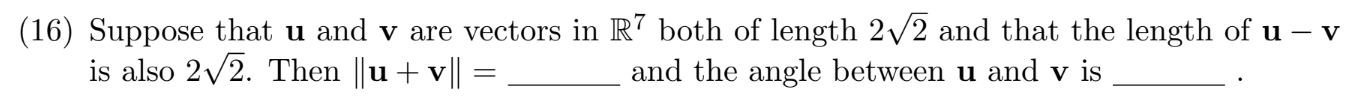

In [164]:
# if u-v is the same length as u and v, I think it must form an equilateral triangle
# if that's the case, then we can calculate in 2d and the answer will be the same in 7d
u = Matrix([2*sqrt(2), 0])
v = Matrix([sqrt(2), sqrt(3)*sqrt(2)])
print(u.norm())
print(v.norm())
print((u-v).norm())
print((u+v).norm())
angle = acos(u.dot(v)/8)

2*sqrt(2)
2*sqrt(2)
2*sqrt(2)
2*sqrt(6)


In [165]:
ansprint(f"||u+v|| = {(u+v).norm()} and the angle between u and v is {angle} radians or {angle/(2*pi)*360} degrees")

***********************************--ANSWER--***********************************

||u+v|| = 2*sqrt(6) and the angle between u and v is pi/3 radians or 60 degrees

***********************************--ANSWER--***********************************


# Problem 1

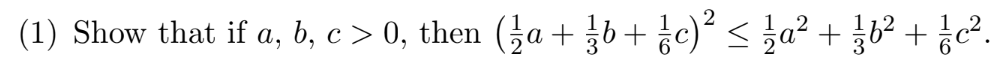

In [166]:
# Cauchy-Schwarz inequality states that |(X.Y)| <= ||X|| * ||Y||
# Let's try:
X = Matrix([a/sqrt(2),b/sqrt(3),c/sqrt(6)])
Y = Matrix([1/sqrt(2),1/sqrt(3),1/sqrt(6)])
X.dot(Y)**2

(a/2 + b/3 + c/6)**2

In [167]:
(X.norm() * Y.norm())**2

Abs(a)**2/2 + Abs(b)**2/3 + Abs(c)**2/6

In [168]:
X.norm()**2

Abs(a)**2/2 + Abs(b)**2/3 + Abs(c)**2/6

In [169]:
Y.norm()**2

1

In [170]:
# These matrices work
display(Math(latex(X) + "," + latex(Y)))

<IPython.core.display.Math object>

# Problem 2

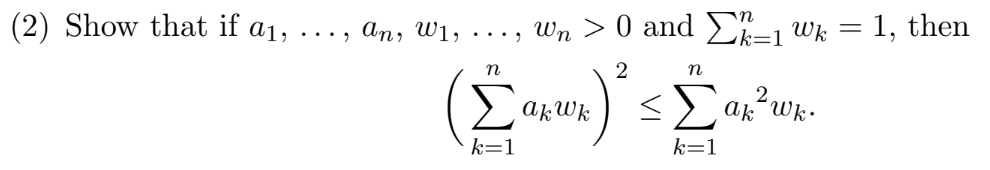

In [171]:
# this is a generalization of Problem 1
# here a1, a2, a3, ... an are similar to a, b, c in the first problem
# and w1, w2, w3, ... wn are similar to 1/2, 1/3, 1/6 in the first problem
# when the sum of the coefficients w add up to 1, we can put them in the second matrix Y as (1*sqrt(w1), 1*sqrt(w2), ..., 1*sqrt(wk))
# and then the first vector X can be (a1*sqrt(w1), a2*sqrt(w2), ..., an*sqrt(wn))
# And the inequality should hold
# let's try with an 1x4 example
sq1s = sqrt(Rational(1,7)) # sq1s
sq2s = sqrt(Rational(2,7)) # sq1s
sq3s = sqrt(Rational(3,7)) # sq1s
X = Matrix([sq1s*a, sq2s*b, sq3s*c, sq1s*d])
Y = Matrix([sq1s, sq2s, sq3s, sq1s])
X.dot(Y)


a/7 + 2*b/7 + 3*c/7 + d/7

In [172]:
X.norm()**2 * Y.norm()**2

Abs(a)**2/7 + 2*Abs(b)**2/7 + 3*Abs(c)**2/7 + Abs(d)**2/7

# Problem 3

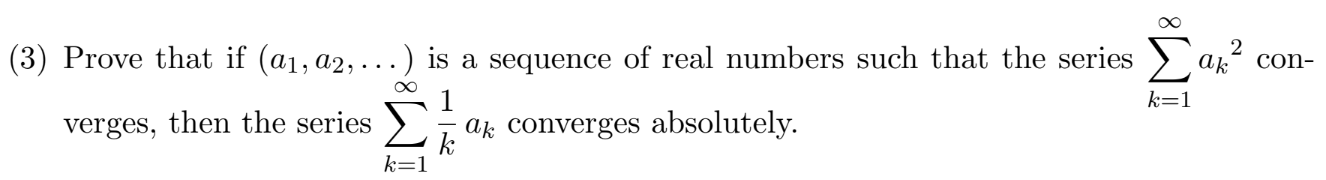

In [173]:
# I'm skipping this one for now
# Erdman has 12 hints after the problem so it looks pretty advanced!